<a href="https://colab.research.google.com/github/JianchaoSun/learning_machine_learning/blob/master/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Assignment 1 - Part 1: Linear Regression on Boston Housing Data</h2>

You're asked to do the following tasks to predict boston house price:
<lu>
<li>Use scikit-learn</li>
<li>Implement analytical solution (normal equation) to obtain weights</li>
<li>Implement numerical solution (gradient descent) to obtain weights</li>
</lu>
    Note: the accuracy of your implementations should be close to that of a linear model from scikit-learn

In addition, you need to show the resulting intercept and coefficents, calculate errors on training dataset and testing dataset, and plot a figure to show your predictions and real prices on the testing dataset. 

In [0]:
# The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt

# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

In [0]:
# Load data from scikit-learn, which returns (data, target)
# note: if you call "boston = load_boston()", it returns a dictionary-like object
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import numpy as np
data, target = load_boston(True)

# Split the data into two parts: training data and testing data
train_data,test_data,train_target,test_target = train_test_split(data,(target[:, np.newaxis]), test_size=0.2, random_state=42)
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

<h4>Use scikit-learn library in the following cell</h4>

coefficient: 
[[-1.00213533  0.69626862  0.27806485  0.7187384  -2.0223194   3.14523956
  -0.17604788 -3.0819076   2.25140666 -1.76701378 -2.03775151  1.12956831
  -3.61165842]]
Interception: 
[22.79653465]
error using sklearn function: 24.29111947497352
error using equation: [12.14555974]


Text(0.5, 1.0, 'Prices vs Predicted prices')

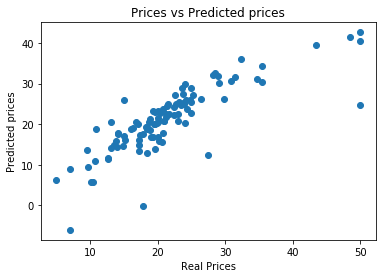

In [150]:
# Task 1-1: use linear regression in sklearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import sklearn
lreg = LinearRegression()
lreg.fit(train_data, train_target)

# Task 1-2: show intercept and coefficents
print("coefficient: ")
print(lreg.coef_)
print("Interception: ")
print(lreg.intercept_ )

def getError(t,p):
  i = 0
  x = 0
  while i < len(p):
    x+= (t[i] - p[i])*(t[i] - p[i])
    i+=1
  r = 0.5/len(p)
  error = r*x
  return error

# Task 1-3: show errors on training dataset and testing dataset
Y_pred = lreg.predict(test_data)
error = sklearn.metrics.mean_squared_error(test_target, Y_pred)
print("error using sklearn function: " + str(error))
er = getError(test_target,result)
print("error using equation: " + str(er))
# Task 1-4: show plot a figure to show your predictions and real prices on the testing dataset
plt.scatter(test_target, Y_pred)
plt.xlabel("Real Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")


<h4>Use analytical solution (normal equation) to perform linear regression in the following cell</h4>

interception: 
22.796534653465343
cofficient: 
[[-1.00213533]
 [ 0.69626862]
 [ 0.27806485]
 [ 0.7187384 ]
 [-2.0223194 ]
 [ 3.14523956]
 [-0.17604788]
 [-3.0819076 ]
 [ 2.25140666]
 [-1.76701378]
 [-2.03775151]
 [ 1.12956831]
 [-3.61165842]]
error using sklearn function: 24.29111947497353
error using equation: [12.14555974]


Text(0.5, 1.0, 'Prices vs Predicted prices')

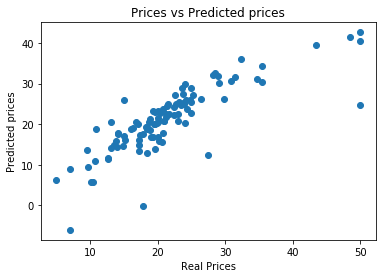

In [149]:
# Task 2-1: Implement a function solving normal equation 
# Inputs: Training data and  training label
# Output: Weights
import numpy as np

def myNormalEqualFun(X,y):
  a = np.matmul(np.transpose(X),X)
  b = np.linalg.inv(a)
  c = np.matmul(b, np.transpose(X))
  d = np.matmul(c,y)
  return d
    
# Task 2-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
  co = np.split(w, [1, 14])[1]
  a = w.item(0)
  i = 0
  for x in co:
   # print("a"+ str(a))
    a += X.item(i)*x
    i+=1
  return a
def getError(t,p):
  i = 0
  x = 0
  while i < len(p):
    x+= (t[i] - p[i])*(t[i] - p[i])
    i+=1
  r = 0.5/len(p)
  error = r*x
  return error

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myNormalEqual to train the model and get weights
w = myNormalEqualFun(train_data_intercept,train_target)

# Task 2-3: show intercept and coefficents
#c = myPredictFun(test_data_intercept,w)
#c
print("interception: ")
print(w.item(0))
co = np.split(w, [1, 14])
print("cofficient: ")
print(co[1])

# Task 2-4: show errors on training dataset and testing dataset
size = test_data.shape[0]
result = [0 for i in range(size)]
i =0
for t in test_data:
  result[i] = myPredictFun(t,w)
  i+=1
error = sklearn.metrics.mean_squared_error(test_target, result) 
print("error using sklearn function: " + str(error))
er = getError(test_target,result)
print("error using equation: " + str(er))

#from sklearn import preprocessing
#import numpy as np
#train_data = preprocessing.scale(train_data)

# Task 2-5: show plot a figure to show your predictions and real prices on the testing dataset
plt.scatter(test_target, result)
plt.xlabel("Real Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")

<h4>Use numerical solution (gradient descent) to perform linear regression in the following cell</h4>

interception: 
22.796534653465343
cofficient: 
[[-0.96695857]
 [ 0.61689417]
 [ 0.15137427]
 [ 0.73866756]
 [-1.98126346]
 [ 3.1809628 ]
 [-0.18429428]
 [-3.04049915]
 [ 1.85534882]
 [-1.32730175]
 [-2.02134907]
 [ 1.12669268]
 [-3.59048965]]
error: 24.54576789168373
error2: [12.27288395]


Text(0.5, 1.0, 'Prices vs Predicted prices')

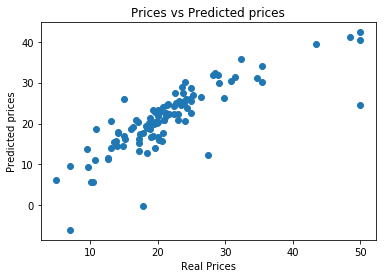

In [148]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


# Task 3-1: Implement a function performing gradient descent
# Inputs: Training data, training label, leaerning rate, number of iterations
# Output: Weights
def myGradientDescentFun(X,y,learning_rate,numItrs):
  n = y.shape[0]
  w = np.arange(0,X.shape[1]).reshape((X.shape[1],1))
  #w = np.arange(y.shape[1], dtype=int)
  np.full_like(w, 10)
  i=0
  #w = np.full((y.shape[1],1 ), 10) 
  while i< numItrs:
    o = (1/n)*X.T
    a = np.subtract(y,np.matmul(X,w))
    inside = np.matmul(o,a)
    w = np.add(w, learning_rate*inside)
    i+=1 
  return w

# Task 3-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
  co = np.split(w, [1, 14])[1]
  a = w.item(0)
  i = 0
  for x in co:
   # print("a"+ str(a))
    a += X.item(i)*x
    i+=1
  return a
def getError(t,p):
  i = 0
  x = 0
  while i < len(p):
    x+= (t[i] - p[i])*(t[i] - p[i])
    i+=1
  r = 0.5/len(p)
  error = r*x
  return error

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations
w = myGradientDescentFun(train_data_intercept,train_target,0.32,100)
# Task 3-3: show intercept and coefficents
print("interception: ")
print(w.item(0))
co = np.split(w, [1, 14])
print("cofficient: ")
print(co[1])

# Task 3-4: show errors on training dataset and testing dataset
size = test_data.shape[0]
result = [0 for i in range(size)]
i =0
for t in test_data:
  result[i] = myPredictFun(t,w)
  i+=1
error = sklearn.metrics.mean_squared_error(test_target, result) 
print("error using sklearn function: " + str(error))
er = getError(test_target,result)
print("error using equation: " + str(er))

# Task 3-5: show plot a figure to show your predictions and real prices on the testing dataset

plt.scatter(test_target, result)
plt.xlabel("Real Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")